In [103]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [104]:
# we have give a json file which consists of all information about
# the products
# loading the data using pandas' read_json file.
data = pd.read_json('amazon_fashon_workshop/tops_fashion.json')
data

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183133,None,B01MSALTSO,OUTERWEAR,$14.58,None,Black,TOOGOO(R),None,Usually ships in 1-2 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,TOOGOO(R) Women's Tops Spring Autumn Casual Pu...,089106A4,https://images-na.ssl-images-amazon.com/images...,None,<b>* TOOGOO is a registered trademark. ONLY Au...
183134,None,B015W98YQK,SHIRT,None,None,Monochrome Plaid,VOGUE CODE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,VOGUE CODE Vintage V Neck Plaid Shirt Sleevele...,None,https://images-na.ssl-images-amazon.com/images...,None,"SIZE CHART <p> XS for length of front 27.6""; l..."
183135,None,B075756PGC,SHIRT,None,None,Pink,Wrangler,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Wrangler George Strait For Her Long Sleeve Pin...,LGS7089,https://images-na.ssl-images-amazon.com/images...,None,Pretty pink print button down Western shirt fr...
183136,None,B074L8FVTT,SHIRT,$44.99,None,Rose,susana monaco,susana monaco,Usually ships in 2-3 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Susana Monaco Womens Susana Monoco Sleeveless ...,None,https://images-na.ssl-images-amazon.com/images...,susana monaco,Color/pattern: rose. Approximately 23in from s...


In [45]:
#data.head(5)

In [105]:
print('Number of data points :',data.shape[0], 
      'Number of features/variables :', data.shape[1])

Number of data points : 183138 Number of features/variables : 19


In [106]:
# each product/item has 19 features in the raw dataset.
# prints column-names or feature-names.
data.columns

Index(['sku', 'asin', 'product_type_name', 'formatted_price', 'author',
       'color', 'brand', 'publisher', 'availability', 'reviews',
       'large_image_url', 'availability_type', 'small_image_url',
       'editorial_review', 'title', 'model', 'medium_image_url',
       'manufacturer', 'editorial_reivew'],
      dtype='object')

In [48]:
# Of these 19 features, we will be using only 7 features in this workshop.
    1. asin  ( Amazon standard identification number)
    2. brand ( brand to which the product belongs to )
    3. color ( Color information of apparel, it can contain many colors as   a value ex: red and black stripes ) 
    4. product_type_name (type of the apperal, ex: SHIRT/TSHIRT )
    5. medium_image_url  ( url of the image )
    6. title (title of the product.)
    7. formatted_price (price of the product)




IndentationError: unexpected indent (<ipython-input-48-cd7e8d884666>, line 2)

In [107]:
data = data[['asin','brand','color','medium_image_url','product_type_name','title','formatted_price']]
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
0,B016I2TS4W,FNC7C,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Minions Como Superheroes Ironman Long Sleeve R...,None
1,B01N49AI08,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Izo Tunic,None
2,B01JDPCOHO,FIG Clothing,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,FIG Clothing Womens Won Top,None
3,B01N19U5H5,Focal18,None,https://images-na.ssl-images-amazon.com/images...,SHIRT,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26


In [108]:
print('Number of data points :', data.shape[0], \
    'Number of features:', data.shape[1])

Number of data points : 183138 Number of features: 7


# Missing data for various features

 Basic stats for feature product_type_name 



In [109]:
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [110]:
# Names of different products
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [ ]:
#Counter(list(data['product_type_name']))

In [111]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))

product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

In [112]:
print(data['brand'].describe())

# 183138 - 182987 = 151 missing values.
# there are 10577 unique brands

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [113]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

In [ ]:
# Basic stats for the feature color

In [114]:
print(data['color'].describe())

# we have 7380 unique colors
# 7.2% of products are black in color
# 64956 of 183138 products have brand information. That's approx 35.4%.

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [115]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

In [ ]:
# Basic stats for feature formatted_price

In [116]:
print(data['formatted_price'].describe())
 

# Only 28,395 (15.5% of whole data) products with price information

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [117]:
formatted_price_count = Counter(list(data['formatted_price']))
formatted_price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

In [ ]:
# Basic stats for feature title

In [118]:
print(data['title'].describe())

# All of the products have a title. 
# Titles are fairly descriptive of what the product is. 
# We use titles extensively in this workshop 
# as they are short and informative.


count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [119]:
# save data file into pickle
data.to_pickle('amazon_fashon_workshop/pickels/180k_apparel_data')

In [120]:
# consider products which have price information
# data['formatted_price'].isnull() => gives the information 
#about the dataframe row's which have null values price == None|Null

data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points after eliminatng price=NULL :',data.shape[0])

Number of data points after eliminatng price=NULL : 28395


In [121]:
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data = data.loc[~data['color'].isnull()]
print('Number of data points after eliminating color = NULL :',data.shape[0])

Number of data points after eliminating color = NULL : 28385


In [123]:
data.to_pickle('amazon_fashon_workshop/pickels/28k_apparel_data')

In [ ]:
# Remove near duplicate items

In [124]:
#read data from pickle file from previous stage
data = pd.read_pickle('amazon_fashon_workshop/pickels/28k_apparel_data')

In [125]:
# Find number of products that have duplicate titles
print(sum(data.duplicated('title')))
# we have 2325 products which have same title but different color



2325


In [126]:
# Read the data from prevous stage
data = pd.read_pickle('amazon_fashon_workshop/pickels/28k_apparel_data')
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,Featherlite Ladies' Long Sleeve Stain Resistan...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,Women's Unique 100% Cotton T - Special Olympic...,$9.99
11,B001LOUGE4,Fitness Etc.,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,Ladies Cotton Tank 2x1 Ribbed Tank Top,$11.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,FeatherLite Ladies' Moisture Free Mesh Sport S...,$20.54
21,B014ICEDNA,FNC7C,Purple,https://images-na.ssl-images-amazon.com/images...,SHIRT,Supernatural Chibis Sam Dean And Castiel Short...,$7.50


In [127]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x:len(x.split())>4)]
print("After removal of products with short description :",data_sorted.shape[0])

After removal of products with short description : 27949


In [128]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [129]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace = True,ascending = False)
data_sorted.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
61973,B06Y1KZ2WB,Éclair,Black/Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,Éclair Women's Printed Thin Strap Blouse Black...,$24.99
133820,B010RV33VE,xiaoming,Pink,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Womens Sleeveless Loose Long T-shirts...,$18.19
81461,B01DDSDLNS,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Women's White Long Sleeve Single Brea...,$21.58
75995,B00X5LYO9Y,xiaoming,Red Anchors,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Stripes Tank Patch/Bear Sleeve Anchor...,$15.91
151570,B00WPJG35K,xiaoming,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,xiaoming Sleeve Sheer Loose Tassel Kimono Woma...,$14.32


In [130]:
# For indices list
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [ ]:
#indices

In [131]:
data_sorted.shape[0]

27949

In [ ]:
# a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', "Women's", 'Shirt', 'X-Large']

#b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', "Women's", 'Shirt', 'Small']

#length = max(len(a),len(b))
#print(length)
#import itertools
#a = ['a','b','c','d','e']
#b = ['a','b','c','d']
#count = 0
#for k in itertools.zip_longest(a,b):
 #   print(k)
  #  if (k[0]==k[1]):
   #     count += 1
        
#print(count)
#data_sorted['asin']

# To find similar products

In [132]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0] 

while i < num_data_points and j < num_data_points:
    previous_i = i
# store the list of words of i th string in a
    a = data['title'].loc[indices[i]].split()
    
# search for similar products sequentially
    j = i+1
    while j < num_data_points:
# store the list of words of j th string in b
        b = data['title'].loc[indices[j]].split() 
    
# store the maximum length of two strings
        length = max(len(a),len(b))
# count is used to store the number of words that are matched in both strings
        count = 0
# itertools.zip_longest(a,b): will map the corresponding words in both strings, 
#it will appened None in case of unequal strings
# example: a =['a', 'b', 'c', 'd']
# b = ['a', 'b', 'd']
# itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b):
            if (k[0]==k[1]):
                count += 1
# if the number of words in which both strings differ are > 2 , 
#we are considering it as those two apperals are different
# if the number of words in which both strings differ are < 2 , 
#we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # no of words in which both sentences are different
     # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])
        
    # start searching for similar apperals corresponds 2nd string


            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break



        



In [133]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

In [134]:
data.shape[0]

17592

In [ ]:
# We removed the duplicates only at the end

In [135]:
print("Number of data points:",data.shape[0])

Number of data points: 17592


In [136]:
data.to_pickle('amazon_fashon_workshop/pickels/17k_apparel_data')

# Remove duplicates: part 2

In [137]:
data = pd.read_pickle('amazon_fashon_workshop/pickels/17k_apparel_data')


In [56]:
#data

In [ ]:

In the previous cell, we sorted whole data in alphabetical order of  titles.
Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt


In [165]:
indices = []
for i, row in data.iterrows():
    indices.append(i)
#indices

In [ ]:
#indices.pop()

In [167]:
indices = []
for i, row in data.iterrows():
    indices.append(i)


stage2_dedupe_asins = []
while len(indices)!= 0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    
    # consider first apparel title
    a = data['title'].loc[i].split()  
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        b = data['title'].loc[j].split()
    # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(b))
    # count is used to store the number of words that are matched in both strings
        count  = 0
    
    # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
     
        for k in itertools.zip_longest(a,b):
            if (k[0]==k[1]):
                count += 1
    # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them

        if (length-count) < 3:
            indices.remove(j)




        


    

In [75]:
#stage2_dedupe_asins

In [170]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
#data = data.loc[data['asin'].isin(stage2_dedupe_asins)]
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]
print("Number of data points after stage 2 dedupe:",data.shape[0])

Number of data points after stage 2 dedupe: 15905


In [171]:
data.to_pickle('amazon_fashon_workshop/pickels/16k_apparel_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

# Text pre-processing

 NLTK download stop words. [RUN ONLY ONCE]
 goto Terminal (Linux/Mac) or Command-Prompt (Window) 
 In the temrinal, type these commands
 $python3
 $import nltk
 $nltk.download()

In [172]:
# we use the list of stop words that are downloaded from nltk lib.

stop_words = set(stopwords.words('english'))
print('list of stop words:', stop_words)


list of stop words: {'while', 'against', 'is', "won't", 'd', 'o', 'if', "should've", 'm', "needn't", 'with', 'hers', 'than', 'shouldn', 'you', 'both', "it's", 'weren', 'do', 'we', 'there', "wouldn't", 'most', 'a', 'just', 'he', 'been', 'but', 'who', "isn't", 'wouldn', 'she', 'having', 'after', "shouldn't", 'these', 'y', "couldn't", 'other', 'won', 'ours', 'because', 'an', 'before', 'am', 'itself', 'some', 'own', 'yourself', 'should', 'on', 'out', 'the', 'over', 't', 'nor', "shan't", 'to', 'until', 'didn', 'when', 'was', 'as', 'each', 'couldn', 'i', 'mightn', 'into', 'then', 'themselves', 'himself', 'through', 'shan', 'it', 'up', 'yours', 'are', 'between', 'my', 'll', 'being', 'doing', 'or', 'once', 'them', "doesn't", 'did', 'below', 'your', 'of', "haven't", 'her', 'now', 'from', "hadn't", 'can', "mightn't", 'me', "that'll", "hasn't", 'again', "she's", 'this', 'their', 'his', 'theirs', "you've", 'hadn', 'too', 'few', 'what', 'in', "don't", 'under', 'not', 'further', 'haven', 'ourselves'

In [173]:
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
        # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # convert all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

            

In [174]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index,row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles
print(time.clock() - start_time, "seconds")

10.470737999999983 seconds


In [175]:
data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics worl...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95
78,B011YPK0MW,Feel The Piece,Navy,https://images-na.ssl-images-amazon.com/images...,SHIRT,feel piece sami dip dye top one size navy,$72.40


In [176]:
data.to_pickle('amazon_fashon_workshop/pickels/16k_apparel_data_preprocessed')



# Stemming
Not used in this.

In [177]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
print(stemmer.stem('arguing'))
print(stemmer.stem('fishing'))


argu
fish


# Text based product similarity

In [178]:
data = pd.read_pickle('amazon_fashon_workshop/pickels/16k_apparel_data_preprocessed')

data.head()

,asin,brand,color,medium_image_url,product_type_name,title,formatted_price
4,B004GSI2OS,FeatherLite,Onyx Black/ Stone,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies long sleeve stain resistant...,$26.26
6,B012YX2ZPI,HX-Kingdom Fashion T-shirts,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,womens unique 100 cotton special olympics worl...,$9.99
15,B003BSRPB0,FeatherLite,White,https://images-na.ssl-images-amazon.com/images...,SHIRT,featherlite ladies moisture free mesh sport sh...,$20.54
46,B01NACPBG2,Fifth Degree,Black,https://images-na.ssl-images-amazon.com/images...,SHIRT,fifth degree womens gold foil graphic tees jun...,$6.95
78,B011YPK0MW,Feel The Piece,Navy,https://images-na.ssl-images-amazon.com/images...,SHIRT,feel piece sami dip dye top one size navy,$72.40


In [180]:
# utility functions which wiil be used 

def display_img(url,ax,fig):
    response = requests.get(url)  # we get the url of the apparel and download it
    img = Image.open(BytesIO(response.content))
    # we will diaplay it in notebook
    plt.imshow(img)
# keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

  
#plotting the code to understand algorithm's decision
def plot_heatmap(keys, values, labels,url,text):
    # we will devide the whole figure into two parts
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1])
    fig = plt.figure(figsize=(25,3))
# 1st, ploting heat map that represents the count of commonly ocurred words in title2

    ax = plt.subplot(gs[0])
    
    # it displays a cell in white color if the word is intersection
    #(list of words of title1 and list of words of title2),in black if not
    ax = sns.heatmap(np.array([values]),annot = np.array([labels]))
    ax.set_xticklabels(keys) # set that axis labels as the words of title
    ax.set_title(text)
    
    # 2nd, plotting image of the the apparel
    ax = plt.subplot(gs[1])
    # we don't want any grid lines for image and no labels on x-axis and y-axis
    ax.set_xticks([])
    ax.set_yticks([])
    
    # we call dispaly_img based with paramete url
    display_img(url, ax, fig)
    
    # displays combine figure ( heat map and image together)
    plt.show()
    
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):
    
    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words
    #contribute to the distance between two title vec's


    intersection = set(vec1.keys()) & set(vec2.keys())
    
    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0
    
    
     # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2):
    #values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)






    

# BOW on product titles

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()
# get number of rows and columns in feature matrix.
# title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(corpus) returns 
# the a sparase matrix of dimensions #data_points * #words_in_corpus

# What is a sparse vector?

# title_features[doc_id, index_of_word_in_corpus] = number of times the word occured in that doc



(15905, 12604)

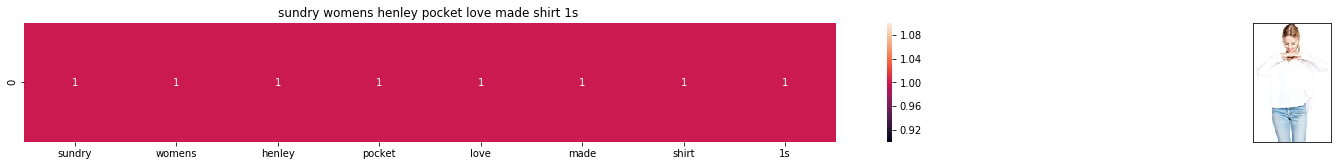

ASIN : B073YGC7BQ
Brand: SUNDRY
Title: sundry womens henley pocket love made shirt 1s 
Euclidean similarity with the query image : 0.0


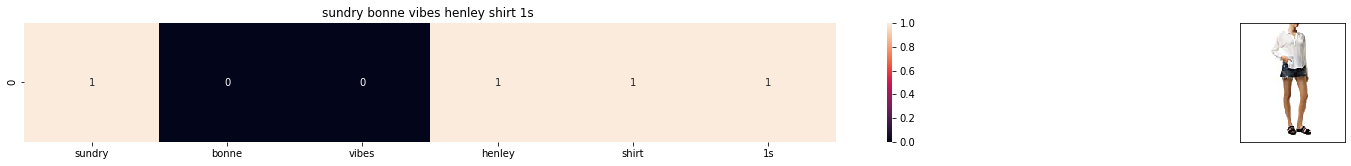

ASIN : B0742PHG7T
Brand: SUNDRY
Title: sundry bonne vibes henley shirt 1s 
Euclidean similarity with the query image : 2.449489742783178


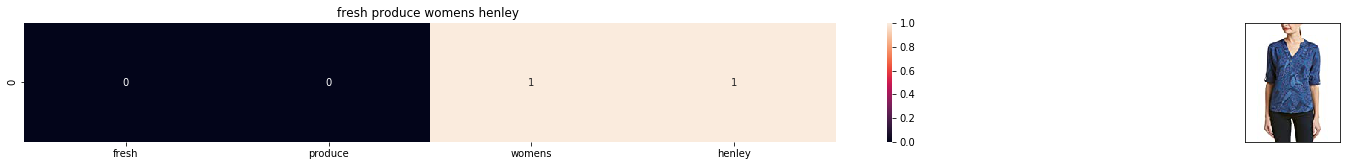

ASIN : B06XZ7V2TG
Brand: Fresh Produce
Title: fresh produce womens henley 
Euclidean similarity with the query image : 2.8284271247461903


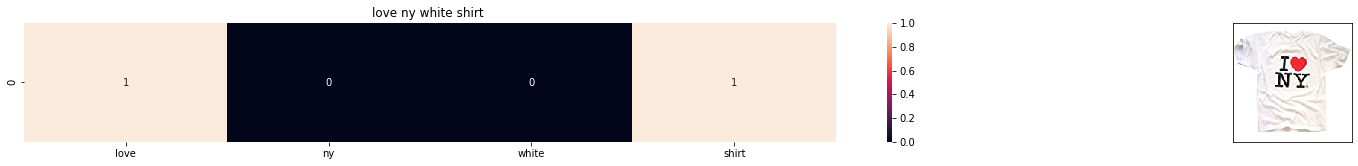

ASIN : B007N3WV6I
Brand: Forgot My Souvenirs
Title: love ny white shirt 
Euclidean similarity with the query image : 2.8284271247461903


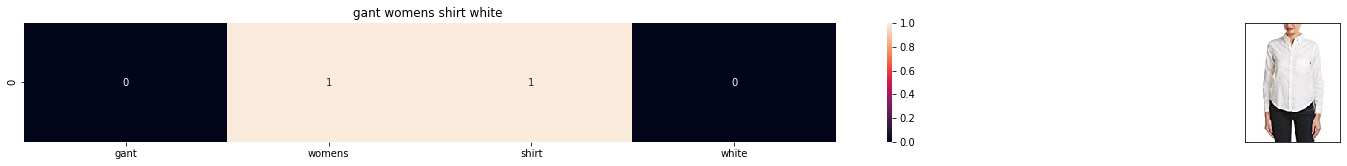

ASIN : B01N80ZGZX
Brand: GANT
Title: gant womens shirt white 
Euclidean similarity with the query image : 2.8284271247461903


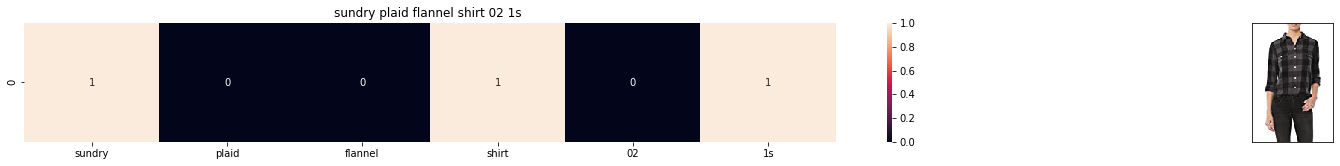

ASIN : B074ZPBJDR
Brand: SUNDRY
Title: sundry plaid flannel shirt 02 1s 
Euclidean similarity with the query image : 2.8284271247461903


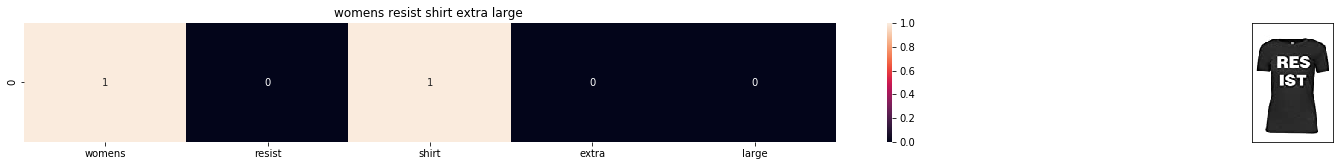

ASIN : B0725BWTN8
Brand: Mission Thread Clothing
Title: womens resist shirt extra large 
Euclidean similarity with the query image : 3.0


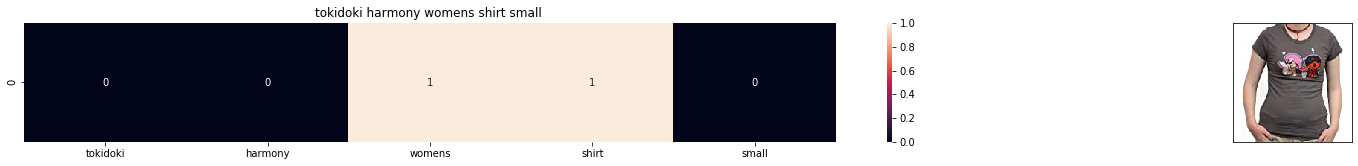

ASIN : B007TVDEG0
Brand: Tokidoki
Title: tokidoki harmony womens shirt small 
Euclidean similarity with the query image : 3.0


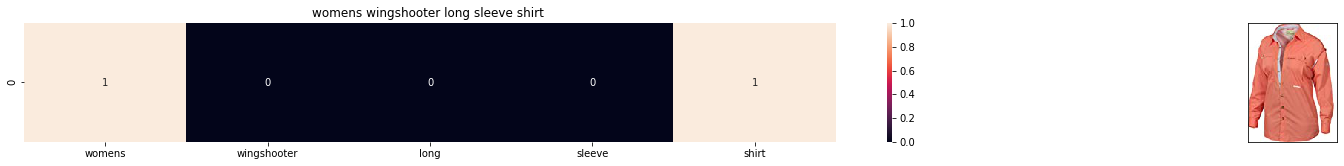

ASIN : B01BNWY6CQ
Brand: Drake
Title: womens wingshooter long sleeve shirt 
Euclidean similarity with the query image : 3.0


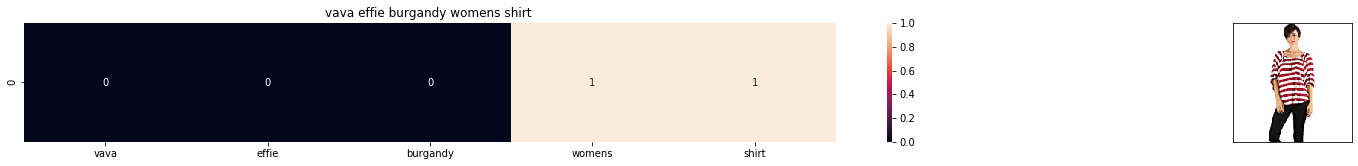

ASIN : B00P6JMCCO
Brand: Vava
Title: vava effie burgandy womens shirt 
Euclidean similarity with the query image : 3.0


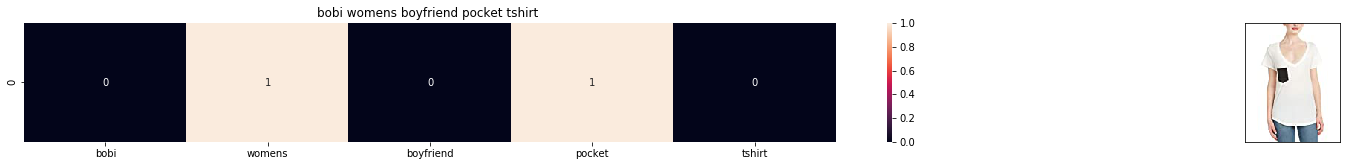

ASIN : B071XD3GFF
Brand: Bobi
Title: bobi womens boyfriend pocket tshirt 
Euclidean similarity with the query image : 3.0


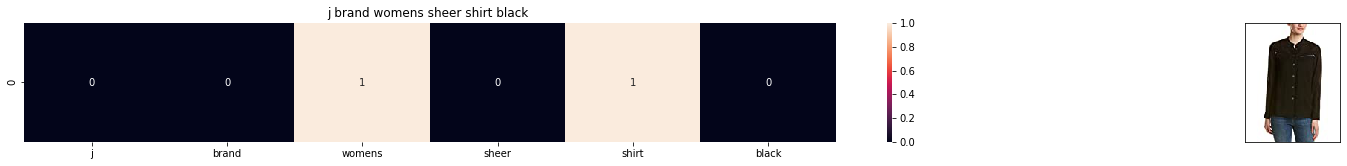

ASIN : B013L1V8PK
Brand: J Brand Jeans
Title: j brand womens sheer shirt black 
Euclidean similarity with the query image : 3.0


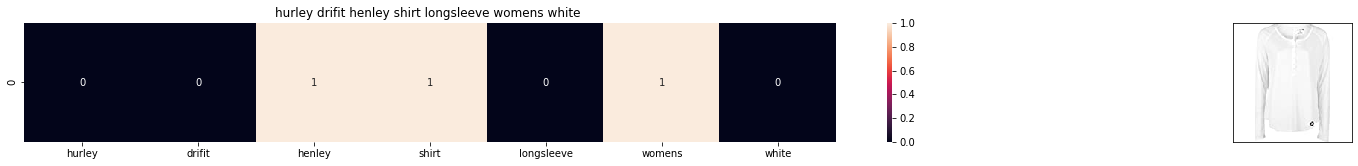

ASIN : B011OIN9ZE
Brand: Hurley
Title: hurley drifit henley shirt longsleeve womens white 
Euclidean similarity with the query image : 3.0


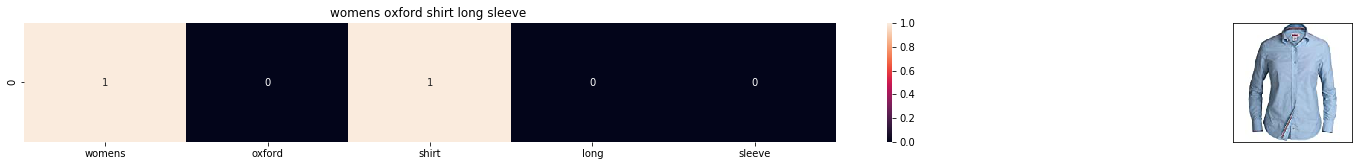

ASIN : B01577JZOC
Brand: Boast
Title: womens oxford shirt long sleeve 
Euclidean similarity with the query image : 3.0


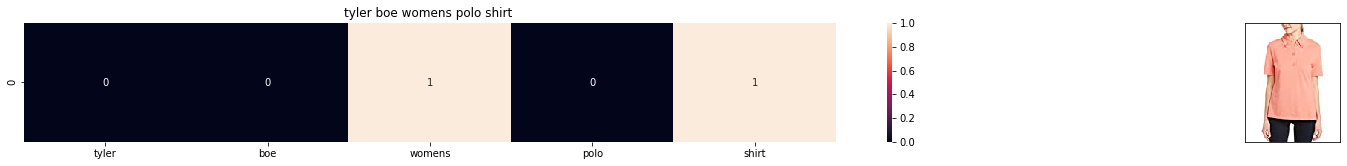

ASIN : B01MQ0TIKA
Brand: TYLER BOE
Title: tyler boe womens polo shirt 
Euclidean similarity with the query image : 3.0


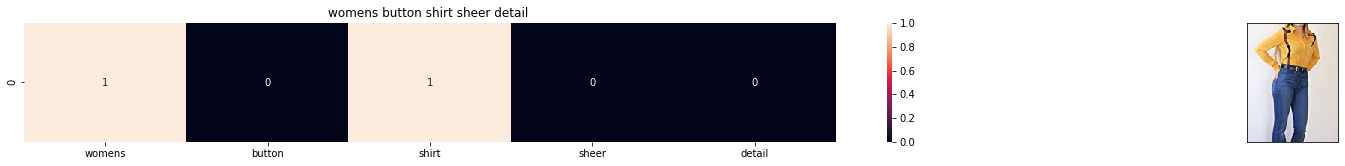

ASIN : B0756RHHHV
Brand: Have
Title: womens button shirt sheer detail 
Euclidean similarity with the query image : 3.0


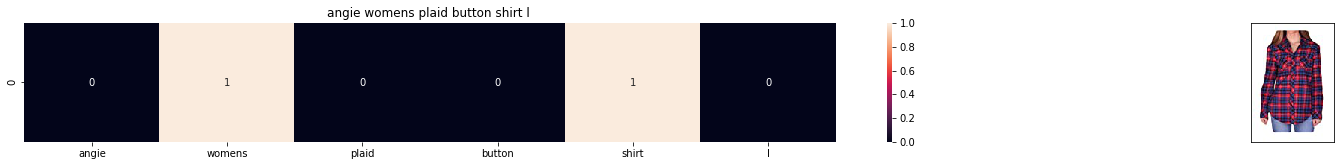

ASIN : B06XKHQ5P5
Brand: Angie
Title: angie womens plaid button shirt l 
Euclidean similarity with the query image : 3.0


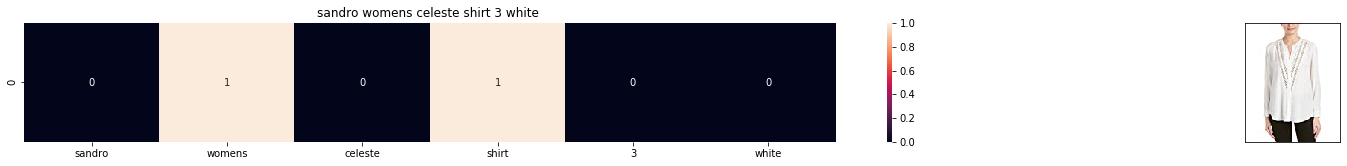

ASIN : B06XNS724Z
Brand: Sandro
Title: sandro womens celeste shirt 3 white 
Euclidean similarity with the query image : 3.0


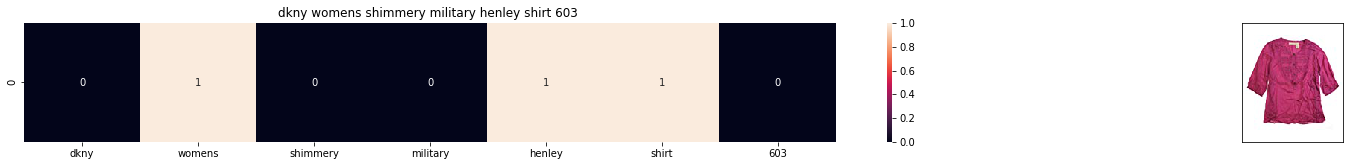

ASIN : B008SIBYH4
Brand: DKNY Jeans
Title: dkny womens shimmery military henley shirt 603 
Euclidean similarity with the query image : 3.0


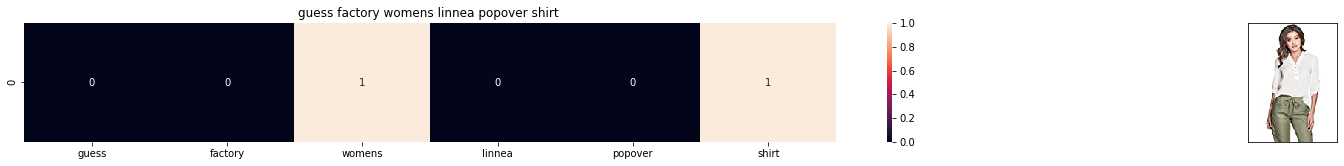

ASIN : B06XJ1XHWF
Brand: G by GUESS
Title: guess factory womens linnea popover shirt 
Euclidean similarity with the query image : 3.1622776601683795


In [182]:
def bag_of_words_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(title_features,title_features[doc_id])
    
    # np.argsort will return indices of the smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the smallest distances
    pdists = np.sort(pairwise_dist.flatten())[0:num_results]
    
        #data frame indices of the 9 smallest distace's

    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
    # we will pass 1. doc_id, 2. title1, 3. title2, url, mod
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], 
                   data['medium_image_url'].loc[df_indices[i]], 'bag_of_words')
        
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print ('Brand:', data['brand'].loc[df_indices[i]])
        print ('Title:', data['title'].loc[df_indices[i]])
        print ('Euclidean similarity with the query image :', pdists[i])
        print('='*60)

#call the bag-of-words model for a product to get similar products.

bag_of_words_model(12566, 20)
# In the output heat map each value represents the count value 
# of the label word, the color represents the intersection 
# with inputs title.






# TF-IDF based product similarity

In [183]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data['title'])
# tfidf_title_features.shape = #data_points * #words_in_corpus
# CountVectorizer().fit_transform(courpus) returns the a sparase matrix of dimensions #data_points * #words_in_corpus
# tfidf_title_features[doc_id, index_of_word_in_corpus] = tfidf values of the word in given doc

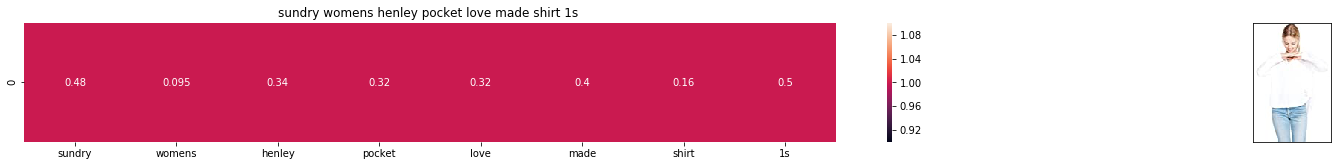

ASIN : B073YGC7BQ
BRAND : SUNDRY
Eucliden distance from the given image : 0.0


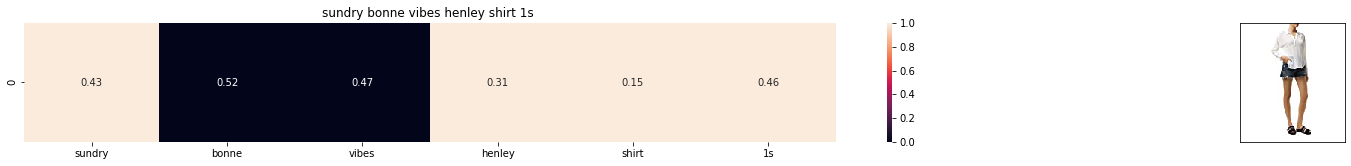

ASIN : B0742PHG7T
BRAND : SUNDRY
Eucliden distance from the given image : 0.9305920496312544


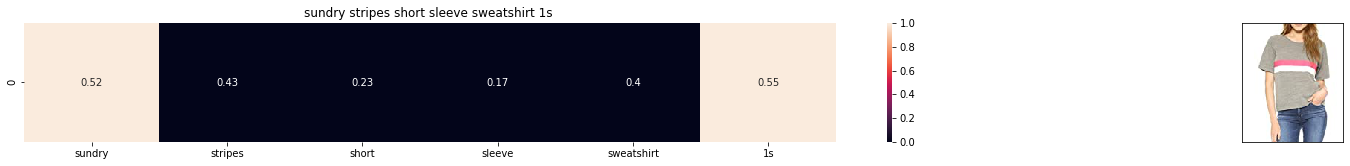

ASIN : B072QBNB7M
BRAND : SUNDRY
Eucliden distance from the given image : 0.9726943063133715


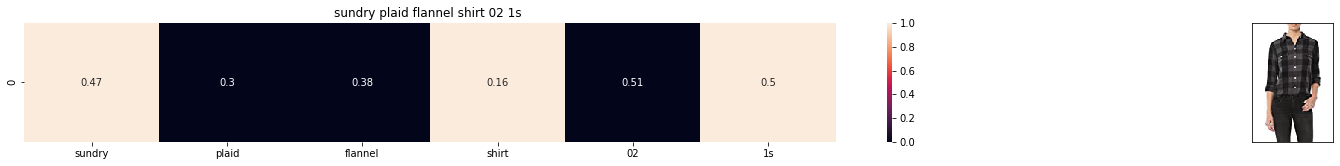

ASIN : B074ZPBJDR
BRAND : SUNDRY
Eucliden distance from the given image : 0.995081870634575


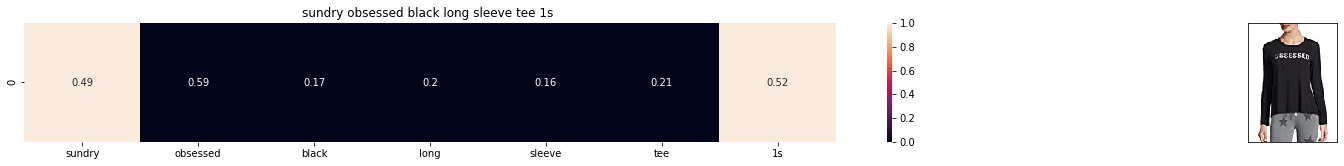

ASIN : B0753HS9RX
BRAND : SUNDRY
Eucliden distance from the given image : 1.0010515042427524


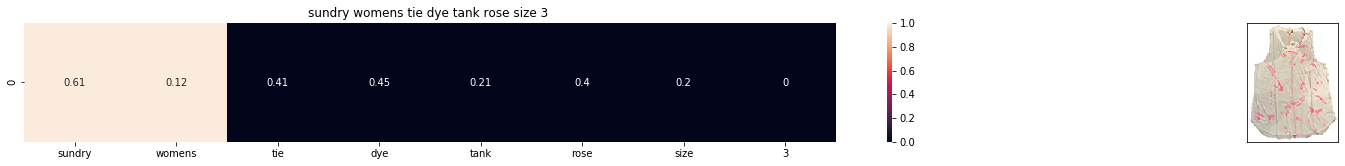

ASIN : B06XNQ1KSB
BRAND : SUNDRY
Eucliden distance from the given image : 1.1833861039549263


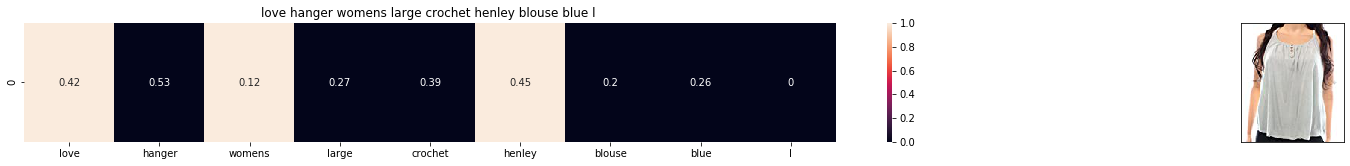

ASIN : B074TTCZ1N
BRAND : Love on a Hanger
Eucliden distance from the given image : 1.18542309392227


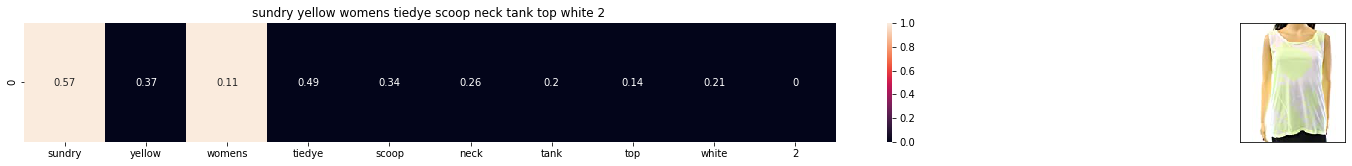

ASIN : B072VGJMLH
BRAND : SUNDRY
Eucliden distance from the given image : 1.1986945301735599


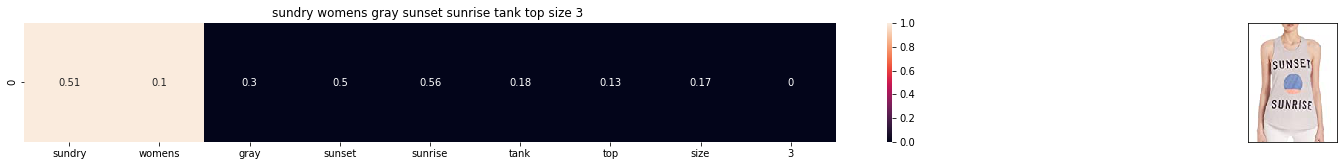

ASIN : B073VVKDCD
BRAND : SUNDRY
Eucliden distance from the given image : 1.2213176213847543


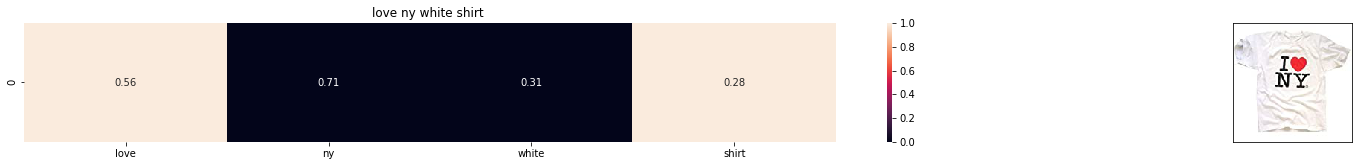

ASIN : B007N3WV6I
BRAND : Forgot My Souvenirs
Eucliden distance from the given image : 1.2459382339009868


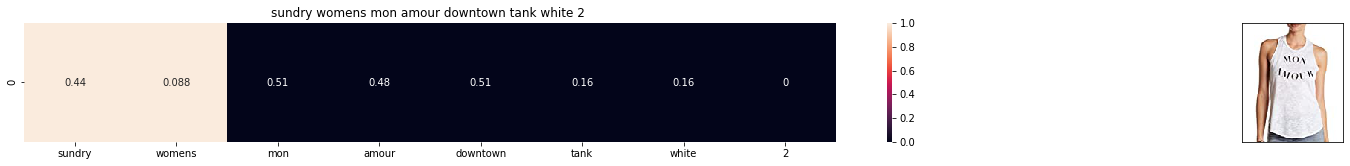

ASIN : B074SXM7DP
BRAND : SUNDRY
Eucliden distance from the given image : 1.2495789703630116


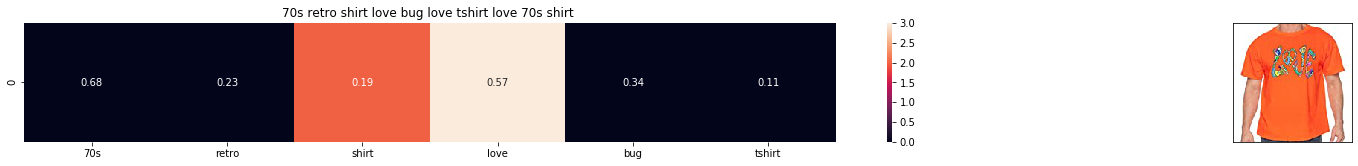

ASIN : B01MQLG1LX
BRAND : Tee Shirt Galaxy
Eucliden distance from the given image : 1.2549793428650862


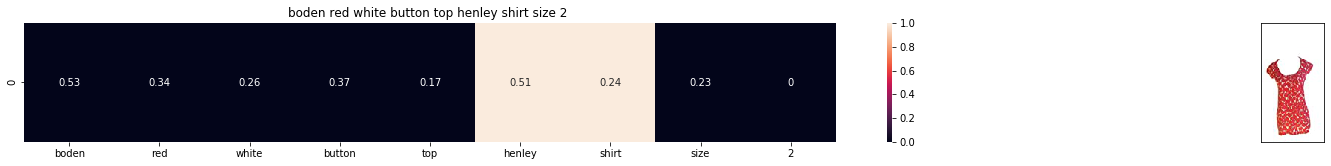

ASIN : B072DZWML6
BRAND : BODEN
Eucliden distance from the given image : 1.2560762721669891


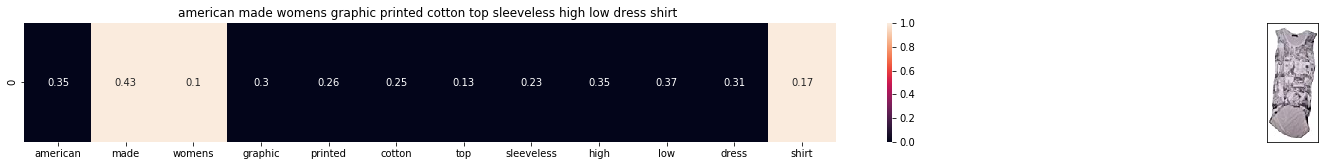

ASIN : B01N9BQJ72
BRAND : Fifth Degree
Eucliden distance from the given image : 1.2564436270618131


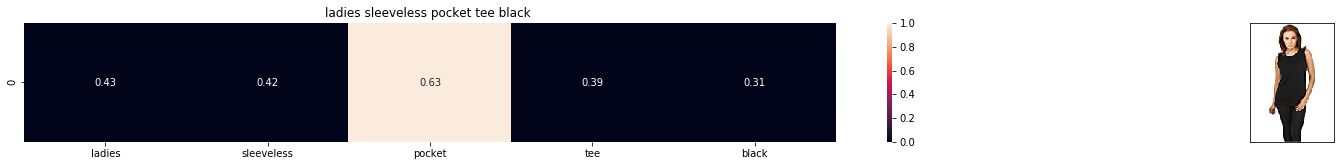

ASIN : B01GG0SZ0Y
BRAND : Urban Classics
Eucliden distance from the given image : 1.2622610749495708


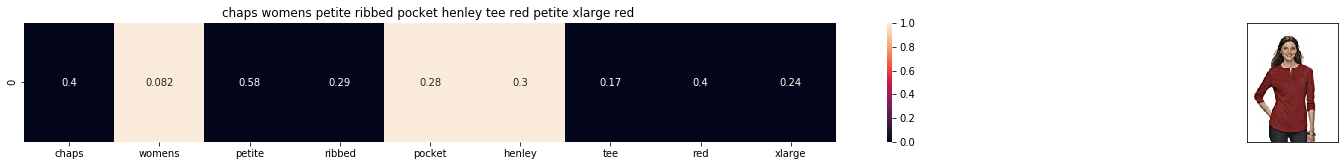

ASIN : B073RNCMCG
BRAND : Chaps
Eucliden distance from the given image : 1.2638415446240703


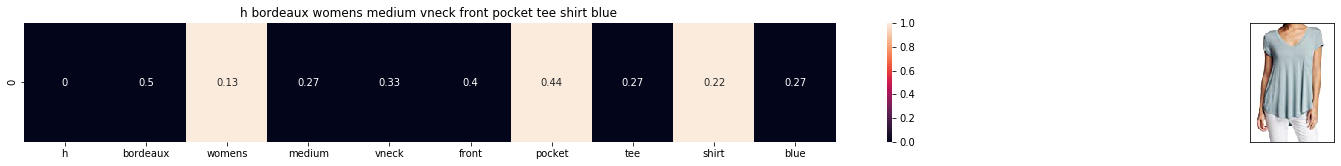

ASIN : B073378HMT
BRAND : H By Bordeaux
Eucliden distance from the given image : 1.2720737690433845


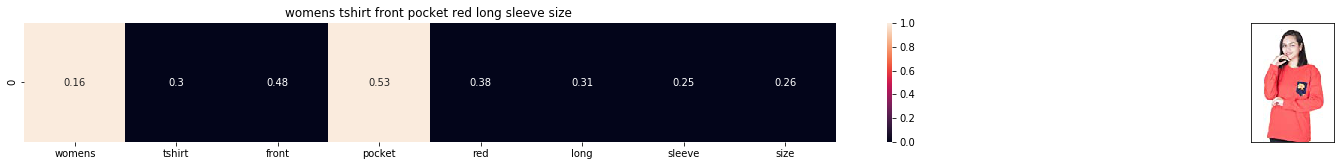

ASIN : B01JR72WHA
BRAND : Lofbaz
Eucliden distance from the given image : 1.2744039568922438


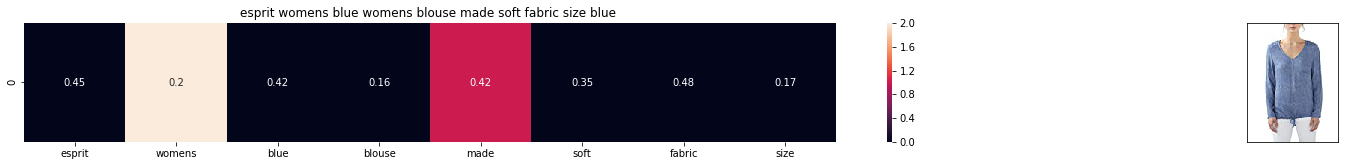

ASIN : B01NBAUVUL
BRAND : Esprit
Eucliden distance from the given image : 1.2746298099162303


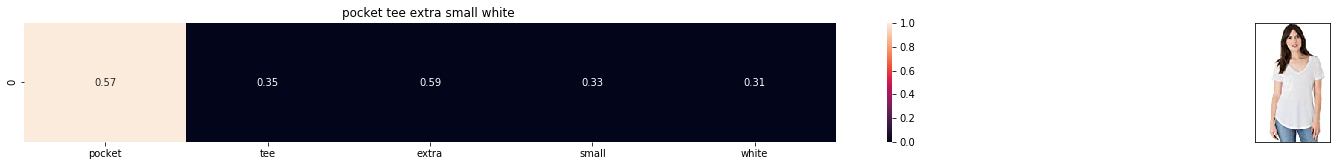

ASIN : B014ROLHSI
BRAND : Z SUPPLY
Eucliden distance from the given image : 1.2765648424102536


In [184]:
def tfidf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        # we will pass 1. doc_id, 2. title1, 3. title2, url, model
        get_result(indices[i], data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'tfidf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)
tfidf_model(12566, 20)
# in the output heat map each value represents the tfidf values of the label word, the color represents the intersection with inputs title